**CHURN MODELLING IN BANKING**

As we know, it is much more expensive to sign in a new client than keeping an existing one. It is advantageous for banks to know what leads a client towards the decision to leave the company. Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dataframe_image as dfi
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
#Load Data Set.
churn_df = pd.read_csv("churn.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### General Information about the Dataset

In [3]:
#Check the format of the Data.
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#Check For Missing Values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#Convert HasCrCard into Categorical Field
churn_df['HasCrCard'] = churn_df['HasCrCard'].replace([0,1],['No','Yes'])
churn_df.IsActiveMember = churn_df["IsActiveMember"].replace([0,1],["No","Yes"])

In [6]:
#Descriptive Statistics For the Categorical Fields
a= churn_df[['Geography','Gender',"HasCrCard","IsActiveMember"]].describe()
df_styled = a.style.background_gradient()
dfi.export(df_styled,"mytable1.jpg")
a

,Geography,Gender,HasCrCard,IsActiveMember
count,10000,10000,10000,10000
unique,3,2,2,2
top,France,Male,Yes,Yes
freq,5014,5457,7055,5151


In [7]:
#Descriptive Statistics for the dataset.
b=churn_df.drop(['Geography','Gender',"RowNumber","CustomerId","HasCrCard","IsActiveMember","Exited"],axis=1).describe()
dfi.export(b,"a.jpg")
b

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


**Summary Highlights:**

1. The bank has 10,000 customers
2. The dataset has 14 features, but RowNumber, CustomerID and Surname are removed.
3. There are no duplicate and no null value from the dataset
4. Most of the customers are located in France
5. Most of the customer's credit score is around 650 which considered as fair
6. Customer's age are vary, ranging from 18 to 92
7. The dataset only has tenure up to 10 years
8. About 70% of the Costumers in the Bank uses Credit Card
9. About 51% of the Customers in the Bank are Active

## Data Visualization

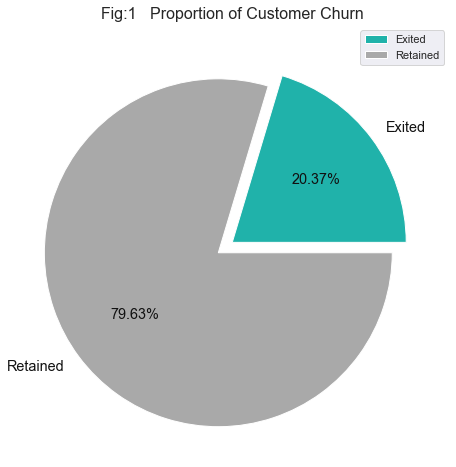

In [8]:
#Create a list that contains the number of exited customer 
ExitedList = [churn_df.Exited[churn_df['Exited']==1].count(), churn_df.Exited[churn_df['Exited']==0].count()]

#set figure size and title
plt.subplots(figsize=(8, 8))
plt.title('Fig:1   Proportion of Customer Churn', size = 16)

#display the proportion of Customer Churn
plt.pie(ExitedList,labels = ['Exited', 'Retained'], autopct='%.2f%%',
        explode = (0 ,0.10),textprops={'color':"#111",'size': "x-large"}, colors = ['lightseagreen','darkgrey'])
plt.legend(labels = ['Exited', 'Retained'], loc = "best",prop={'size': 11})

plt.savefig("Scatter2.jpg",bbox_inches='tight',dpi =200)

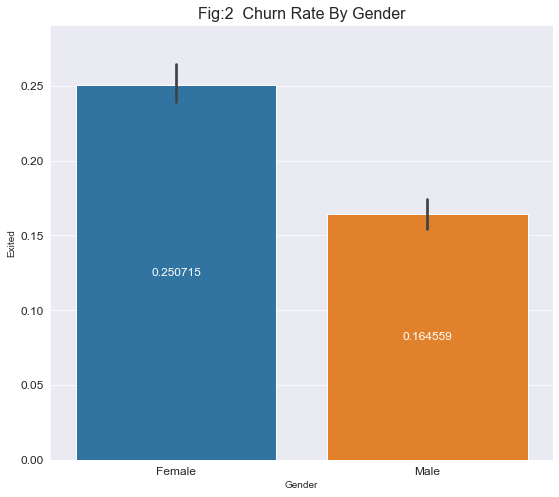

In [9]:
# plot data
import matplotlib 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 8))
plt.title('Fig:2  Churn Rate By Gender', size = 16)
g = sns.barplot(x="Gender",y="Exited",data=churn_df) 
# annotate
g.bar_label(ax.containers[0], label_type='center',fmt='%g',fontsize=12, color = "w")

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter2.jpg",bbox_inches='tight',dpi =200)

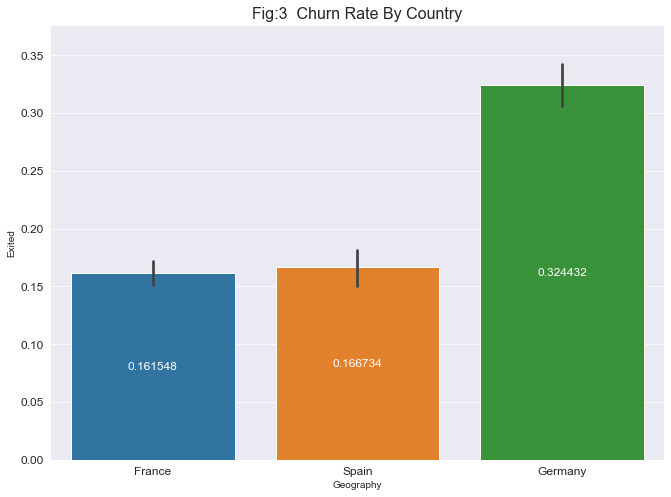

In [10]:
# plot data
import matplotlib 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(11, 8))
plt.title('Fig:3  Churn Rate By Country', size = 16)
g = sns.barplot(x="Geography",y="Exited",data=churn_df) 
# annotate
g.bar_label(ax.containers[0], label_type='center',fmt='%g',fontsize=12, color = "w")

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter2.jpg",bbox_inches='tight',dpi =200)

**Summary highlights:**
1. 20.37 percent of customers left/exited the bank. **(Fig: 1)**

2. Despite the fact that there are more males than females in the summary statistics, females exited the bank at a rate of 25.07 %. **(Fig: 2)**

3. Despite having more customers in France, 30% of customers in Germany leave the bank. **(Fig: 3)**

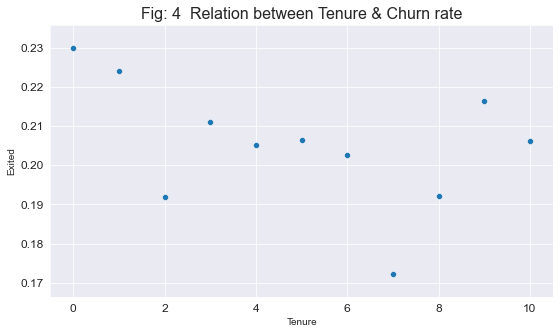

In [11]:
# Visualize Relation between Tenure & Churn rate
plot_by_tenure = churn_df.groupby('Tenure').Exited.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 5))
plt.title('Fig: 4  Relation between Tenure & Churn rate', size = 16)
g = sns.scatterplot(x=plot_by_tenure["Tenure"],y=plot_by_tenure["Exited"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter3.jpg",bbox_inches='tight',dpi =200)

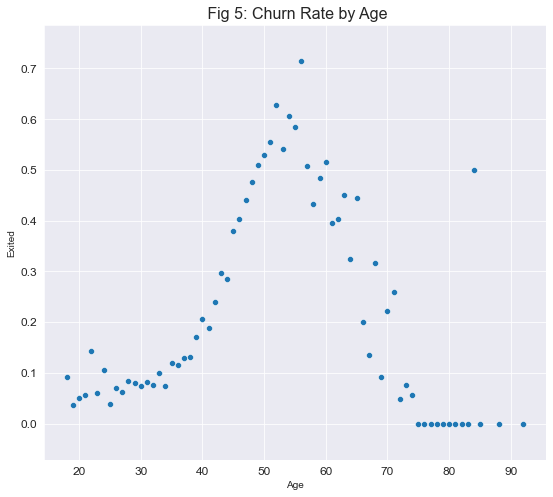

In [12]:
#Churn Rate by Age
plot_by_age = churn_df.groupby('Age').Exited.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(9, 8))
plt.title(' Fig 5: Churn Rate by Age', size = 16)
g = sns.scatterplot(x=plot_by_age["Age"],y=plot_by_age["Exited"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter4.jpg",bbox_inches='tight',dpi =200)

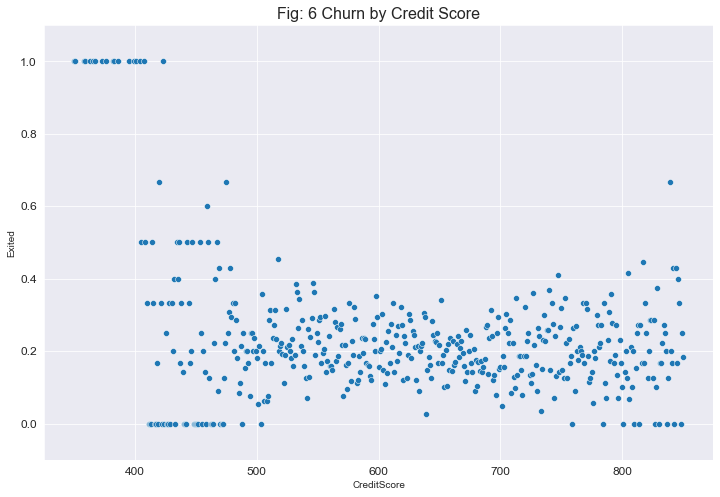

In [13]:
#Churn Rate by Credit Score
plot_by_score= churn_df.groupby('CreditScore').Exited.mean().reset_index()
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Fig: 6 Churn by Credit Score', size = 16)
g = sns.scatterplot(x=plot_by_score["CreditScore"],y=plot_by_score["Exited"])

# pad the spacing between the number and the edge of the figure
g.margins(y=0.1)

fig.savefig("Scatter5.jpg",bbox_inches='tight',dpi =200)

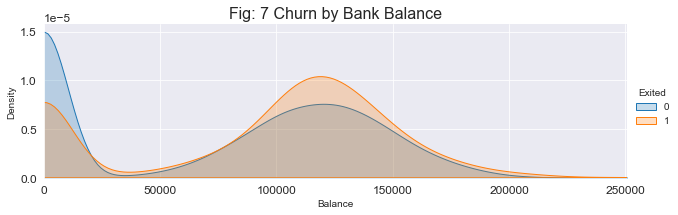

In [14]:
facet = sns.FacetGrid(churn_df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, churn_df["Balance"].max()))
facet.add_legend()

plt.title('Fig: 7 Churn by Bank Balance', size = 16)
facet.savefig("Scatter7.jpg",bbox_inches='tight',dpi =200)

**Summary Highlights**
1. In terms of tenure, clients on either end of the spectrum (having spent little or a lot of time with the bank) are more likely to churn than those with an average tenure. **(Fig: 4)** 
2. Older customers aged 50-60 years old, despite constituting a small proportion of the customer base, have a proclivity to leave the bank **(Fig: 5)**
3. Customers with lower credit card scores are more likely to churn. **(Fig: 6)**

4. Worryingly, the bank is losing customers with large bank balances, which will reduce their available capital for lending. **(Fig: 7)**

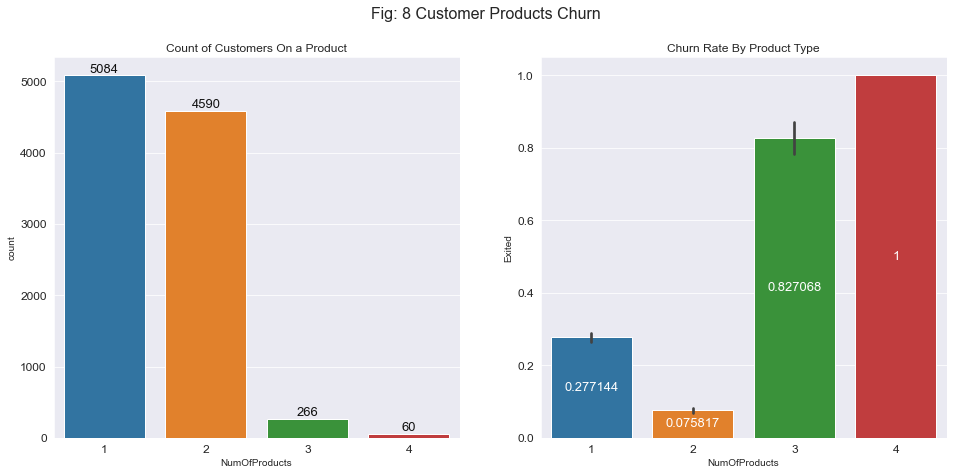

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Fig: 8 Customer Products Churn', size = 16)

# Count of Customers On a Product
g= sns.countplot(ax= axes[0], x="NumOfProducts",data=churn_df)
g.bar_label(axes[0].containers[0], label_type='edge',fmt='%g',fontsize=13, color = "#111")
axes[0].set_title("Count of Customers On a Product")

# Churn Rate By Product Type
a = sns.barplot(ax= axes[1], x="NumOfProducts",y="Exited",data=churn_df) 
a.bar_label(axes[1].containers[0], label_type='center',fmt="%g",fontsize=13, color = "w")
axes[1].set_title('Churn Rate By Product Type')

fig.savefig("Scatter6.jpg",bbox_inches='tight',dpi =200)

**Summary Highlights:**

Products 3 and 4 have more customer exit, despite the fact that they are used by a small number of customers. Products 1 and 2 are the most frequently used by customers, whereas products 3 and 4 are rarely used but have a higher exit rate.

**Recommendations**
1. Given the geography, customers in Germany have a high churn rate. The bank should concentrate on improving its facilities and services in Germany.

2. Older people (51-60) may require a better product or promotion, such as a better retirement plan, higher interest rate, or similar.

3. The bank should discontinue using products 3 and 4, as they are less likely to be chosen and have a high churn rate. As a result, the bank can concentrate on promoting products 1 and 2. Because the churn rate is quite high (27%), the company can review customer satisfaction and opinion for product number one.

**Note**

Because 20% of customers have churned, the baseline model may be able to predict that 20% of customers will churn. Given that 20% is a small number, we must ensure that the chosen model accurately predicts this 20%, as it is more important for the bank to identify and retain this group than it is to accurately predict the customers who are retained.

## Feature Engineering

### One-Hot Enconding

In [16]:
#Remove less important Features
churn_df.drop(['RowNumber', 'Surname',"CustomerId"],axis=1,inplace=True) 

In [17]:
#Perform One Hot Encoding using get_dummies method
churn_df = pd.get_dummies(churn_df, columns = ['Geography', 'Gender','HasCrCard', 'IsActiveMember',"NumOfProducts"],drop_first=True)

### MinMax Scaling 

In [18]:
# minMax scaling the continuous variables
continuous_vars =['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'] 
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
churn_df[continuous_vars]=pd.DataFrame(min_max.fit_transform(churn_df[continuous_vars]))
churn_df.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0.324324,0.2,0.000000,0.506735,1,0,0,0,1,1,0,0,0
1,0.516,0.310811,0.1,0.334031,0.562709,0,0,1,0,0,1,0,0,0
2,0.304,0.324324,0.8,0.636357,0.569654,1,0,0,0,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.469120,0,0,0,0,0,0,1,0,0
4,1.000,0.337838,0.2,0.500246,0.395400,0,0,1,0,1,1,0,0,0


### Resampling (OverSampling) 

Because 20% of customers have churned, the baseline model may be able to predict that 20% of customers will churn. This is a problem since the data is imbalance. This will create a bias in our accuracy. To prevent this we will perform oversampling on our dataset.

In [19]:
# Checking the shape of the exited coulmn by class
churned = churn_df[churn_df['Exited']==1]
not_churn = churn_df[churn_df['Exited']==0]
print(churned.shape,not_churn.shape)

(2037, 14) (7963, 14)


In [20]:
#Create independent and Dependent Features
columns = churn_df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Exited"]]
# Store the variable we are predicting 
target = "Exited"
# Define a random state 
state = np.random.RandomState(42)
X = churn_df[columns]
Y = churn_df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(10000, 13)
(10000,)


In [21]:
from imblearn.over_sampling import SMOTE
# Implementing Oversampling for Handling Imbalanced 
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_res, y_res = sm.fit_resample(X, Y)

In [22]:
X_res.shape,y_res.shape

((15926, 13), (15926,))

In [23]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 7963, 1: 2037})
Resampled dataset shape Counter({1: 7963, 0: 7963})


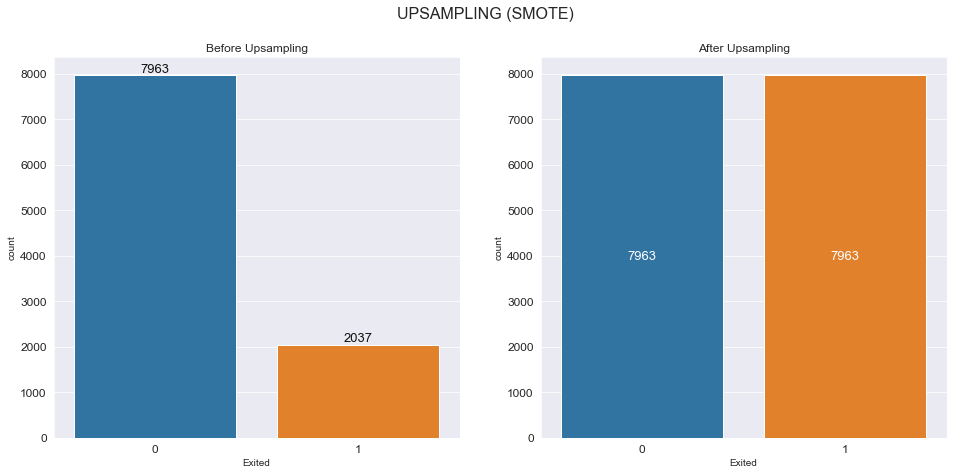

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('UPSAMPLING (SMOTE)', size = 16)

# Count of Customers On a Product
g= sns.countplot(ax= axes[0], x="Exited",data=churn_df)
g.bar_label(axes[0].containers[0], label_type='edge',fmt='%g',fontsize=13, color = "#111")
axes[0].set_title("Before Upsampling")

# Churn Rate By Product Type
a= sns.countplot(ax= axes[1], x=y_res,data=churn_df)
a.bar_label(axes[1].containers[0], label_type='center',fmt="%g",fontsize=13, color = "w")
axes[1].set_title('After Upsampling')

fig.savefig("Scatte8.jpg",bbox_inches='tight',dpi =200)

Once our data is balanced let's move on to build our machine learning model

## Train Non_Tree Based Models

In [25]:
#Create Feature variable X and Target variable y
y1 = y_res
X1 = X_res

In [26]:
#Split the data into training set (75%) and test set (25)
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 50)

To choose the best model, the first 4 non-esemble techniques classification models are compared and the best one is selected based on their accuracy score since the data is balanced

In [27]:
# Machine Learning classification model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

In [28]:
#Fit the logistic Regression Model
logit = LogisticRegression(random_state=50)
logit.fit(X1_train,y1_train)

#Predict the value for new, unseen data
pred = logit.predict(X1_test)

# Find Accuracy using accuracy_score method
logit_accuracy = round(metrics.accuracy_score(y1_test, pred) * 100, 2)
logit_recall = round(metrics.recall_score(y1_test,pred)*100, 2)
logit_precision = round(metrics.precision_score(y1_test,pred)*100, 2)
logit_f1 = round(metrics.f1_score(y1_test,pred)*100, 2)



In [29]:
#Fit the Support Vector Machine Model
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(X1_train,y1_train)
#Predict the value for new, unseen data
svc_pred = svcmodel.predict(X1_test)

# Find Accuracy using accuracy_score method
svc_accuracy = round(metrics.accuracy_score(y1_test, svc_pred) * 100, 2)
svc_recall = round(metrics.recall_score(y1_test,svc_pred)*100, 2)
svc_f1 = round(metrics.f1_score(y1_test,svc_pred)*100, 2)

In [30]:
#Fit the K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(X1_train, y1_train) 
  
#Predict the value for new, unseen data
knn_pred = knnmodel.predict(X1_test)

# Find Accuracy using accuracy_score method
knn_accuracy = round(metrics.accuracy_score(y1_test, knn_pred) * 100, 2)
knn_recall = round(metrics.recall_score(y1_test,knn_pred)*100, 2)
knn_precision = round(metrics.precision_score(y1_test,knn_pred)*100, 2)
knn_f1 = round(metrics.f1_score(y1_test,knn_pred)*100, 2)

In [31]:
#Fit the Naive Bayes Classifier
bcmodel = GaussianNB()
bcmodel.fit(X1_train,y1_train)

#Predict the value for new, unseen data
bc_pred = bcmodel.predict(X1_test)

# Find Accuracy using accuracy_score method
bc_accuracy = round(metrics.accuracy_score(y1_test, bc_pred) * 100, 2)
bc_recall = round(metrics.recall_score(y1_test,bc_pred)*100, 2)
bc_precision = round(metrics.precision_score(y1_test,bc_pred)*100, 2)
bc_f1 = round(metrics.f1_score(y1_test,bc_pred)*100, 2)


### Comparison Of Non Tree Based Models

In [32]:
# Compare Several models according to their Accuracies
Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              "NaiveBayes Classifier"],
    'Accuracy': [logit_accuracy, svc_accuracy, knn_accuracy, 
              bc_accuracy],
    'F1-Score': [logit_f1, svc_f1, knn_f1, 
              bc_f1]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Model')
mod = Model_Comparison_df.reset_index()
dfi.export(mod,"mytable6.jpg")

From the Model comparison above Random Forest had the highest accuracy score and F1-Score, before making predictions with it we will plot the confusion matrix to see how well the model did in predictions.

## Training Tree-Based and Esemble Techniques

### Data Pre-processing

In [33]:
#import csv
df = pd.read_csv("churn.csv")

In [34]:
#Convert HasCrCard into Categorical Field
df['HasCrCard'] = df['HasCrCard'].replace([0,1],['No','Yes'])
df.IsActiveMember = df["IsActiveMember"].replace([0,1],["No","Yes"])
df.NumOfProducts=df.NumOfProducts.astype(str)


In [35]:
#Drop less important Features
df.drop(['RowNumber', 'CustomerId', 'Surname'],inplace=True,axis=1)

In [36]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels.
cat_vars =['Geography',"HasCrCard","Gender","IsActiveMember","NumOfProducts",] 
df[cat_vars] = df[cat_vars].apply(LabelEncoder().fit_transform)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,0,1,1,101348.88,1
1,608,2,0,41,1,83807.86,0,0,1,112542.58,0
2,502,0,0,42,8,159660.80,2,1,0,113931.57,1
3,699,0,0,39,1,0.00,1,0,0,93826.63,0
4,850,2,0,43,2,125510.82,0,1,1,79084.10,0


### Resampling (OverSampling)

In [37]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Exited"]]
# Store the variable we are predicting 
target = "Exited"
# Define a random state 
state = np.random.RandomState(42)
X1 = df[columns]
Y1 = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X1.shape[0], X1.shape[1]))
# Print the shapes of X & Y


from imblearn.over_sampling import SMOTE
# Implementing Oversampling for Handling Imbalanced 
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_res1, y_res1 = sm.fit_resample(X1, Y1)
print(X_res1.shape)
print(y_res1.shape)

(15926, 10)
(15926,)


### Train Tree_Esemble Based Models

In [38]:
#Declare the independent and dependent variables
X = X_res1
y=y_res1

In [39]:
#Split the data into training set (75%) and test set (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [41]:
#Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = "gini", random_state = 50)
dtmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
dt_pred = dtmodel.predict(X_test)

# Find Accuracy using accuracy_score method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)
dt_recall = round(metrics.recall_score(y_test,dt_pred)*100, 2)
dt_precision = round(metrics.precision_score(y_test,dt_pred)*100, 2)
dt_f1 = round(metrics.f1_score(y_test,dt_pred)*100, 2)

In [42]:
#Fit the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 50)
rfmodel.fit(X_train, y_train) 
  
#Predict the value for new, unseen data
rf_pred = rfmodel.predict(X_test)

# Find Accuracy using accuracy_score method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)
rf_recall = round(metrics.recall_score(y_test,rf_pred)*100, 2)
rf_precision = round(metrics.precision_score(y_test,rf_pred)*100, 2)
rf_f1 = round(metrics.f1_score(y_test,rf_pred)*100, 2)

In [43]:
#Fit the XgBoost Classifier 
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

#Predict the value for new, unseen data
xg_pred = model.predict(X_test)

# Find Accuracy using accuracy_score method
xg_accuracy = round(metrics.accuracy_score(y_test, xg_pred) * 100, 2)
xg_recall = round(metrics.recall_score(y_test,xg_pred)*100, 2)
xg_precision = round(metrics.precision_score(y_test,xg_pred)*100, 2)
xg_f1 = round(metrics.f1_score(y_test,xg_pred)*100, 2)

### Compare the accuracies and F1-Scores for the Tree Models

In [44]:
# Compare Several models according to their Accuracies
Model_Comparison1 = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [dt_accuracy,rf_accuracy , xg_accuracy],              
    'F1-Score': [dt_f1,rf_f1, xg_f1]}) 
             
Model_Comparison_df1 = Model_Comparison1.sort_values(by='Accuracy', ascending=False)
Model_Comparison_df1 = Model_Comparison_df1.set_index('Model')
ma=Model_Comparison_df1.reset_index()
dfi.export(ma,"mytable7.jpg")

### Model Comaprison Using ROC and AUC

After training the classifier on train dataset, we are using the model to predict the target values for test dataset. We are storing the predicted class from the seven models and we will use it to get their ROC AUC scores

In [45]:
# Predicted class for each model
y_score1 = logit.predict_proba(X1_test)[:,1]
y_score2 = svcmodel.predict_proba(X1_test)[:,1]
y_score3 = knnmodel.predict_proba(X1_test)[:,1]
y_score4 = bcmodel.predict_proba(X1_test)[:,1]
y_score5 = dtmodel.predict_proba(X_test)[:,1]
y_score6 = rfmodel.predict_proba(X_test)[:,1]
y_score7 = model.predict_proba(X_test)[:,1]

In [46]:
#Calculating the False and True Positive Rates and Their Threshold for the ROC_Curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y1_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y1_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y1_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y1_test, y_score4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, y_score6)
false_positive_rate7, true_positive_rate7, threshold7 = roc_curve(y_test, y_score7)

In [47]:
auc1= round(roc_auc_score(y1_test, y_score1),4)
auc2= round(roc_auc_score(y1_test, y_score2),4)
auc3= round(roc_auc_score(y1_test, y_score3),4)
auc4= round(roc_auc_score(y1_test, y_score4),4)
auc5= round(roc_auc_score(y_test, y_score5),4)
auc6= round(roc_auc_score(y_test, y_score6),4)
auc7= round(roc_auc_score(y_test, y_score7),4)

# Compare Several models according to their Accuracies
Model_Comparison2 = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost','Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              "NaiveBayes Classifier"],
    'ROC_AUC-Score': [auc5,auc6,auc7,auc1,auc2,auc3,auc4]}) 
             
Model_Comparison_df2 = Model_Comparison2.sort_values(by='ROC_AUC-Score', ascending=False)
Model_Comparison_df2 = Model_Comparison_df2.set_index('Model')
Model_Comparison_df2=Model_Comparison_df2.reset_index()

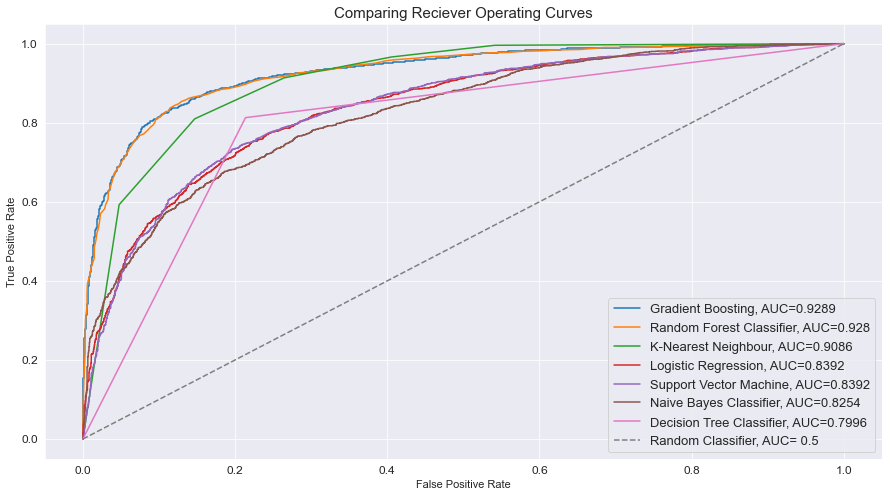

In [48]:
#set up plotting area
plt.figure(figsize=(15,8))
plt.title("Comparing Reciever Operating Curves",size = 15)
plt.ylabel('True Positive Rate',size = 11)
plt.xlabel('False Positive Rate',size = 11)
#Plot the ROC Curves for each classifier
plt.plot(false_positive_rate7,true_positive_rate7,label="Gradient Boosting, AUC="+str(auc7))
plt.plot(false_positive_rate6,true_positive_rate6,label="Random Forest Classifier, AUC="+str(auc6))
plt.plot(false_positive_rate3,true_positive_rate3,label="K-Nearest Neighbour, AUC="+str(auc3))
plt.plot(false_positive_rate1,true_positive_rate1,label="Logistic Regression, AUC="+str(auc1))
plt.plot(false_positive_rate2,true_positive_rate2,label="Support Vector Machine, AUC="+str(auc2))
plt.plot(false_positive_rate4,true_positive_rate4,label="Naive Bayes Classifier, AUC="+str(auc4))
plt.plot(false_positive_rate5,true_positive_rate5,label="Decision Tree Classifier, AUC="+str(auc5))
plt.plot([0, 1], ls="--",label="Random Classifier, AUC= 0.5")
#add legend
plt.legend(prop={"size":13},loc=0)

plt.savefig("AUC.jpg",bbox_inches='tight',dpi =200)

The Gradient Boosting classifier got the best AUC of all the Classification Algorithms, measuring 0.9286. It demonstrates that the model can distinguish between positive and negative classes with a 93% probability. However, the Random Forest came in second with a score of 0.928. In that case, there is a 93% chance that the Random Forest Classifier can distinguish between positive and negative classifications.

### Comparing All Classification Models used

In [49]:
Models_Comp = pd.concat([Model_Comparison_df, Model_Comparison_df1], axis = 0)
Models_Comp = Models_Comp.sort_values(by='Accuracy', ascending=False)
Models_Comp=Models_Comp.reset_index()

In [50]:
result = pd.merge(Models_Comp, Model_Comparison_df2, on="Model")
result

dfi.export(result,"mytable10.jpg")

### CHECKING FOR OVER FITTING AND UNDERFITTING

In [51]:
#accuracy of test data
rf_pred = rfmodel.predict(X_test)
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

#accuracy of train data
rf_pred1 = rfmodel.predict(X_train)
rf_accuracy2 = round(metrics.accuracy_score(y_train, rf_pred1) * 100, 2)

print("accuracy of test data:",rf_accuracy,"%")
print("accuracy of train data:",rf_accuracy2,"%")

accuracy of test data: 86.14 %
accuracy of train data: 100.0 %


In [52]:
#accuracy of test data
_pred = model.predict(X_test)
_accuracy = round(metrics.accuracy_score(y_test, _pred) * 100, 2)

#accuracy of train data
_pred1 = model.predict(X_train)
_accuracy2 = round(metrics.accuracy_score(y_train, _pred1) * 100, 2)

print("accuracy of test data:",_accuracy,"%")
print("accuracy of train data:",_accuracy2,"%")

accuracy of test data: 85.79 %
accuracy of train data: 95.09 %


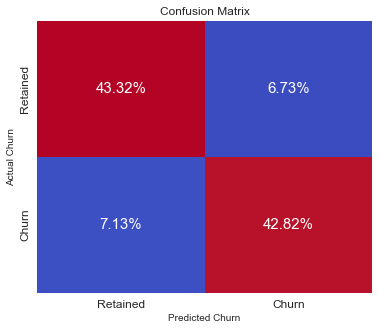

In [53]:
#Generate confusion matrix for the RandomForest model as it has maximum Accuracy
from sklearn.metrics import confusion_matrix
conf_mat_rfmodel = confusion_matrix(y_test,rf_pred)
plt.figure(figsize=(6,5))
ax= plt.subplot()
sns.heatmap(conf_mat_rfmodel/np.sum(conf_mat_rfmodel),annot = True,fmt='.2%',cmap = "coolwarm",cbar = False,annot_kws={'fontsize': 15,  'color':'w'})
# labels, title and ticks
ax.set_xlabel('Predicted Churn');ax.set_ylabel('Actual Churn'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Retained', 'Churn']); ax.yaxis.set_ticklabels(['Retained', 'Churn']);

**Summary of Model Performance**

This confusion matrix compares "true" values to what our random forest model predicted, and it is interpreted as follows: each quadrant represents all conceivable scenarios that our model might have predicted and compares them to the actual data. Quadrant I (top left) represents the cases where the random forest model correctly predicted no churn and no churn really occurred in real life (37.97 % of total test population) - these are also known as False Positives since we have correctly recognized negative values. Quadrant IV (bottom right) - quantify the percent of times when a customer effectively churned and our model projected that it would churn — these are known as True Positives and account for 38.42 %. In contrast, Quadrant II ( upper right) and Quadrant III (bottom left) demonstrate the model's level of inaccuracy. In other words, 12.08% of the overall population would fall into the area where our model predicted individuals would leave but they did not. Diametrically, Quadrant III shows that the model incorrectly classified 11.53% of the overall population as non-churned. By adding the percentages of Quadrants I and IV and comparing them to the percentages of Quadrants II and III, we may infer that our model is accurate 76% of the time but incorrect 24% of the time. Given the different scenarios and interpretabilities that the matrix generates, you may have noticed why it is called a confusion matrix by now, but I hope that my explanation was simple enough to help you understand the overall concept.

Before we use this model for prediction, we need to check whether our model is overfitting or underfitting.From our result we found out that the model is overfitting, this is a bad indication, since our train set has a 100% accuracy, the model will perform poorly in unseen data. So we solve this problem by performing random forest hyperparameter tuning with GridSearchCV

### Random Forest hyperparameter tuning with RandomSearchCV

In [54]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop =500 , num = 12)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6,11]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10,15,100,50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10,15]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion =["gini","entropy"]

In [55]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               "criterion":criterion}
print(param_grid)

{'n_estimators': [2, 47, 92, 137, 183, 228, 273, 318, 364, 409, 454, 500], 'max_depth': [2, 4, 6, 11], 'min_samples_split': [2, 5, 10, 15, 100, 50], 'min_samples_leaf': [1, 2, 5, 10, 15], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [65]:
rfmod = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 50)

In [66]:
#Genrate a GridSearchCV with random forest as the estimator, and a cross validation of 3
from sklearn.model_selection import RandomizedSearchCV
rs_Grid = RandomizedSearchCV(estimator = rfmod, param_distributions=param_grid, cv = 7, verbose=-1,n_jobs = -1,n_iter=11,scoring="accuracy")

In [67]:
rs_Grid.fit(X_train, y_train)

RandomizedSearchCV(cv=7,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=50),
                   n_iter=11, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 11],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              50],
                                        'n_estimators': [2, 47, 92, 137, 183,
                                                         228, 273, 318, 364,
                                                         409, 454, 500]},
                   scoring='accuracy', verbose=-1)

In [68]:
# accuracy of test data
rs_Grid_pred1 = rs_Grid.predict(X_test)
rs_Grid_accuracy1 = round(metrics.accuracy_score(y_test,rs_Grid_pred1) * 100, 2)

#accuracy of train data
rs_Grid_pred2 = rs_Grid.predict(X_train)
rs_Grid_accuracy2 = round(metrics.accuracy_score(y_train, rs_Grid_pred2) * 100, 2)

print("accuracy of test data:",rs_Grid_accuracy1,"%")
print("accuracy of train data:",rs_Grid_accuracy2,"%")

accuracy of test data: 85.06 %
accuracy of train data: 92.33 %


### Confusion Matrix after Hyperparameter Tuning

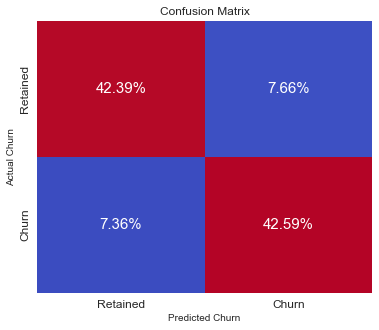

In [60]:
from sklearn.metrics import confusion_matrix
conf_mat_rfmodel = confusion_matrix(y_test,rs_Grid_pred1 )
plt.figure(figsize=(6,5))
ax= plt.subplot()
sns.heatmap(conf_mat_rfmodel/np.sum(conf_mat_rfmodel),annot = True,fmt='.2%',cmap = "coolwarm",cbar = False,annot_kws={'fontsize': 15,  'color':'w'})
# labels, title and ticks
ax.set_xlabel('Predicted Churn');ax.set_ylabel('Actual Churn'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Retained', 'Churn']); ax.yaxis.set_ticklabels(['Retained', 'Churn']);

The model’s accuracy came out to be 0.83 which is 85% after hyperparameter tuning with 15% misclassification. We still managed to get control the reduction of the type II error, where the test will wrongly predict no churn but the patient actually churned. This result seems to be quite decent. However since the sample size of the dataset is really small, I strongly believe that the model will still increase in overall accuracy, when large dataset is available for training.

## Feature Importance

Let see which indendent variable helped a lot in training the dataset. This will give us a great idea of the feature which positively or negatively affects the prediction of churn

<AxesSubplot:>

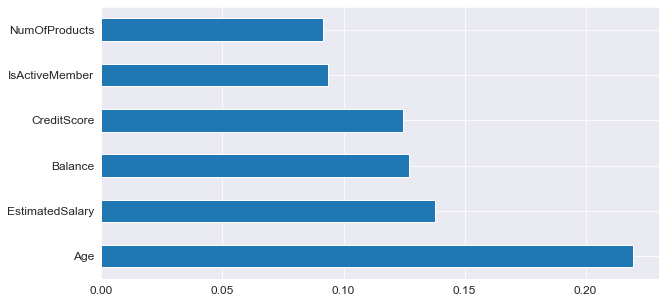

In [61]:
plt.figure(figsize=(10,5))
feat_importances = pd.Series(rfmodel.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.sort_values(ascending=False)
feat_importances.nlargest(6).plot(kind='barh')

The random forest gives a lot of importance to the “Age” feature, but it also chooses “EstimatedSalary” to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.